In [16]:
pip install --upgrade matplotlib seaborn



   ---------------------------------------- 0.0/7.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/7.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/7.8 MB 435.7 kB/s eta 0:00:18
   ---------------------------------------- 0.1/7.8 MB 751.6 kB/s eta 0:00:11
    --------------------------------------- 0.2/7.8 MB 919.0 kB/s eta 0:00:09
   - -------------------------------------- 0.3/7.8 MB 1.3 MB/s eta 0:00:06
   -- ------------------------------------- 0.4/7.8 MB 1.6 MB/s eta 0:00:05
   -- ------------------------------------- 0.5/7.8 MB 1.7 MB/s eta 0:00:05
   --- ------------------------------------ 0.7/7.8 MB 1.9 MB/s eta 0:00:04
   ---- ----------------------------------- 0.8/7.8 MB 2.1 MB/s eta 0:00:04
   ---- ----------------------------------- 0.9/7.8 MB 2.1 MB/s eta 0:00:04
   ----- ---------------------------------- 1.0/7.8 MB 2.0 MB/s eta 0:00:04
   ------ --------------------------------- 1.2/7.8 MB 2.2 MB/s eta 0:00:03
   ------ ---------

In [17]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns; sns.set()
from sklearn.datasets import fetch_20newsgroups



In [18]:
data = fetch_20newsgroups()
data.target_names

['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']

In [19]:
categories=['alt.atheism','comp.graphics','comp.os.ms-windows.misc','comp.sys.ibm.pc.hardware','comp.sys.mac.hardware','comp.windows.x','misc.forsale','rec.autos','rec.motorcycles','rec.sport.baseball','rec.sport.hockey','sci.crypt','sci.electronics','sci.med','sci.space','soc.religion.christian','talk.politics.guns','talk.politics.mideast','talk.politics.misc','talk.religion.misc']
train=fetch_20newsgroups(subset='train',
                        categories=categories)
test=fetch_20newsgroups(subset='test',
                        categories=categories)

In [20]:
  print((train.data[5]))

From: dfo@vttoulu.tko.vtt.fi (Foxvog Douglas)
Subject: Re: Rewording the Second Amendment (ideas)
Organization: VTT
Lines: 58

In article <1r1eu1$4t@transfer.stratus.com> cdt@sw.stratus.com (C. D. Tavares) writes:
>In article <1993Apr20.083057.16899@ousrvr.oulu.fi>, dfo@vttoulu.tko.vtt.fi (Foxvog Douglas) writes:
>> In article <1qv87v$4j3@transfer.stratus.com> cdt@sw.stratus.com (C. D. Tavares) writes:
>> >In article <C5n3GI.F8F@ulowell.ulowell.edu>, jrutledg@cs.ulowell.edu (John Lawrence Rutledge) writes:
>
>> >> The massive destructive power of many modern weapons, makes the
>> >> cost of an accidental or crimial usage of these weapons to great.
>> >> The weapons of mass destruction need to be in the control of
>> >> the government only.  Individual access would result in the
>> >> needless deaths of millions.  This makes the right of the people
>> >> to keep and bear many modern weapons non-existant.

>> >Thanks for stating where you're coming from.  Needless to say, I
>> >disagree 

In [21]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline

In [22]:
model = make_pipeline(TfidfVectorizer(),MultinomialNB())
model.fit(train.data,train.target)
labels = model.predict(test.data)

In [23]:
# import matplotlib
# matplotlib.use('Agg')

Text(171.74999999999997, 0.5, 'predicted label')

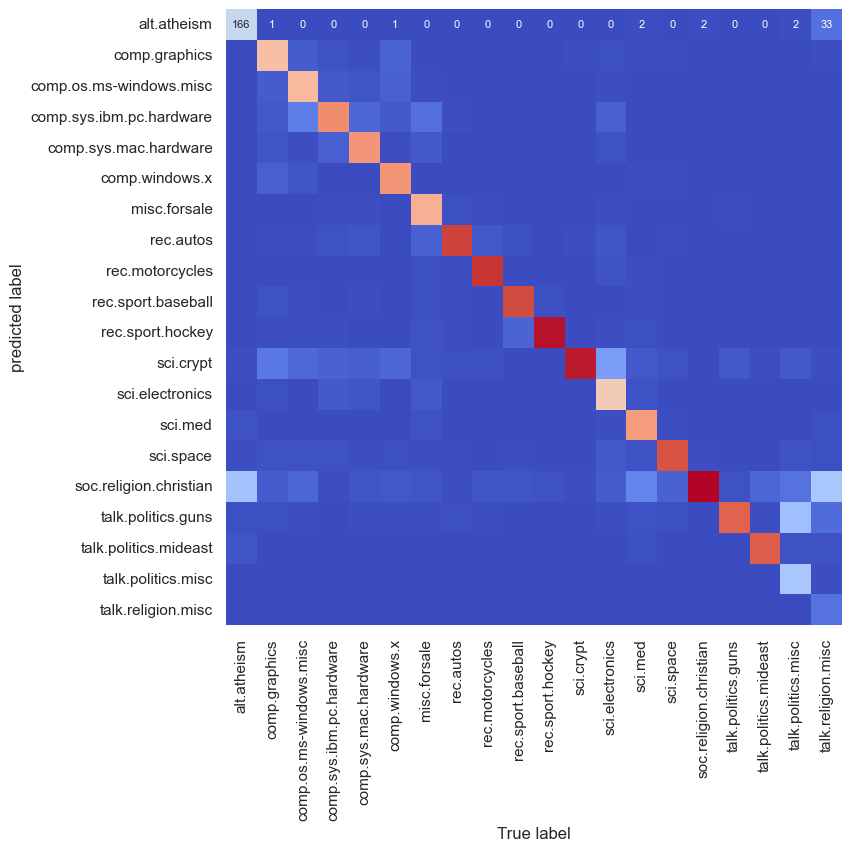

In [24]:
from sklearn.metrics import confusion_matrix
mat=confusion_matrix(test.target,labels)
plt.figure(figsize=(10, 8))
sns.heatmap(mat.T, square=True ,annot=True,fmt='d',
           cbar=False,xticklabels=train.target_names,yticklabels=train.target_names,annot_kws={"size": 8}
           ,cmap='coolwarm')
plt.xlabel('True label')
plt.ylabel('predicted label')
# plt.savefig('confusion_matrix.png', dpi=150);

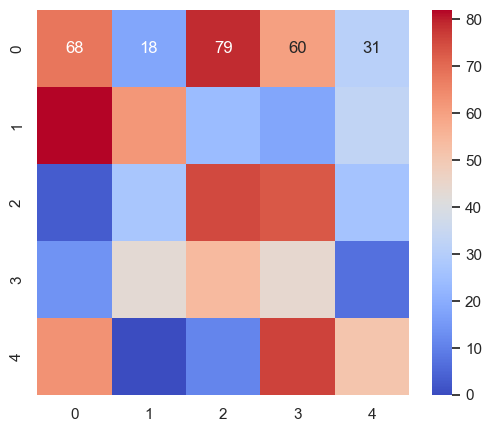

In [14]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Create a simple test matrix
test_data = np.random.randint(0, 100, size=(5, 5))

plt.figure(figsize=(6, 5))
sns.heatmap(test_data, annot=True, fmt='d', cmap='coolwarm', annot_kws={"size": 12})
plt.show()

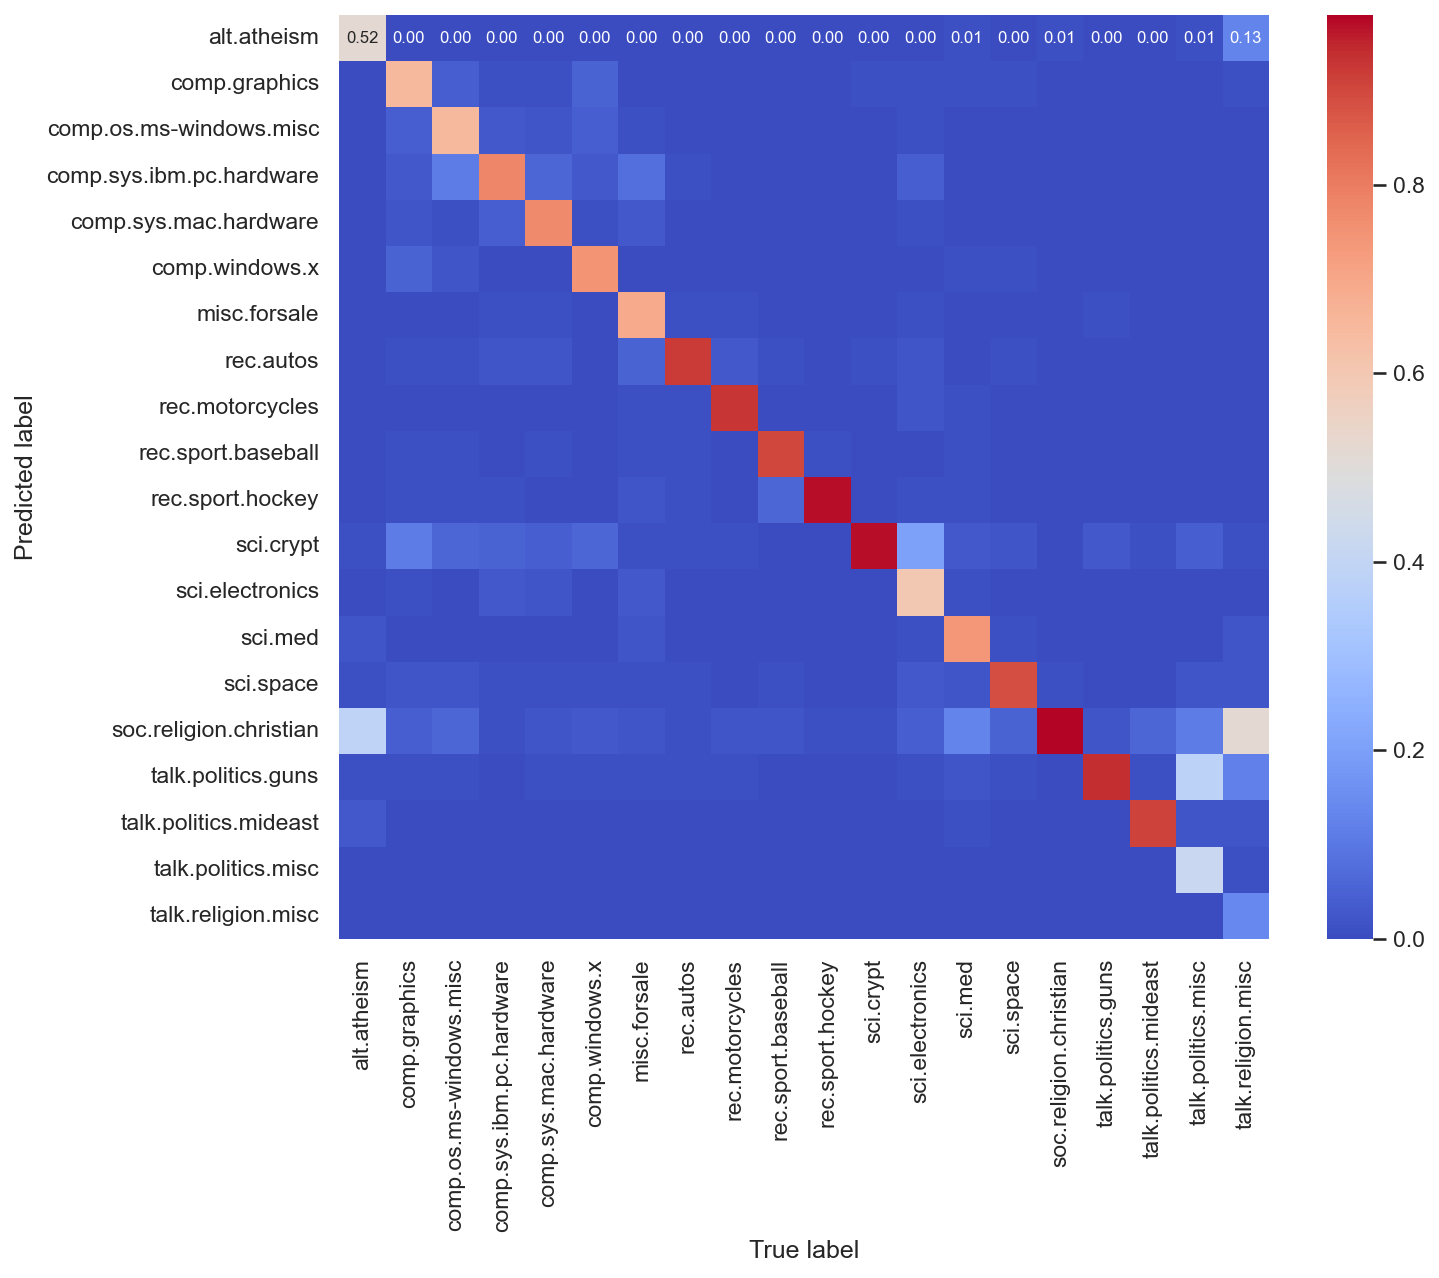

In [15]:
import numpy as np

# Normalize the confusion matrix
mat_normalized = np.around(mat.astype('float') / mat.sum(axis=1)[:, np.newaxis], decimals=2)

plt.figure(figsize=(10, 8), dpi=150)
sns.heatmap(mat_normalized.T, annot=True, fmt='.2f', cmap='coolwarm',
            xticklabels=train.target_names, yticklabels=train.target_names, annot_kws={"size": 8})
plt.xlabel('True label')
plt.ylabel('Predicted label')
plt.show()

In [25]:
def predict_category(s,train=train , model=model):
    pred=model.predict([s])
    return train.target_names[pred[0]]

In [30]:
predict_category('President of Kenya')

'talk.politics.misc'